In [1]:
#import keras
import pandas as pd
import sklearn as skl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import SGDClassifier

# 1 Préparation des données

## 1.2 Information sur les données

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [4]:
# taille features 
print(X.shape)
# taille labels

print(y.shape)

(70000, 784)
(70000,)


In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
mnist['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

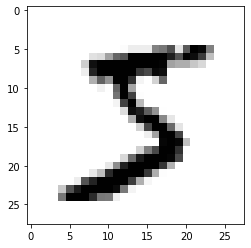

In [7]:
some_digit = X[0]
digit = some_digit.reshape(28,28)
plt.imshow(digit, cmap=plt.cm.gray_r)

In [8]:
cr = type(y[0])
cr

str

In [9]:
# 5)
y = y.astype(np.uint8)
ff = type(y[0])
ff

numpy.uint8

## 1.3 Répartition des données

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000)

In [11]:
#X_train, X_test, y_train, y_test = X[60000:], X[:10000], y[60000:], y[:10000]

# 2 Apprentissage d’un classifieur binaire
## 2.1 Apprentissage des données

In [12]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [13]:
sgd_clf = SGDClassifier(random_state=42)                                   
sgd_clf.fit(X_train, y_train_5) 

SGDClassifier(random_state=42)

In [14]:
sgd_clf.predict([some_digit])

array([False])

In [15]:
sgd_clf.score(X_test, y_test_5)

0.9683

##  2.2 Évaluation du modèle d’apprentissage sur les données d’apprentissage
### 2.2.1 Taux de classification

In [16]:
# 1)
scores = cross_val_score(sgd_clf, X_train, y_train_5,scoring="accuracy", cv=3)
scores

array([0.9448, 0.9655, 0.9641])

In [17]:
scores.mean()

0.9581333333333332

In [18]:
# 2)
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)
    

In [19]:
never_5_clf= Never5Classifier()

In [20]:
never_scores = cross_val_score(never_5_clf, X_train, y_train_5,scoring="accuracy", cv=3 )
print(never_scores)
print(never_scores.mean().round(5))

[0.90855 0.91215 0.9107 ]
0.91047


### 2.2.2 Matrice de confusion:

In [21]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [22]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train_5, y_train_pred))

[[53426  1202]
 [ 1310  4062]]


### 2.2.3 Précision et rappel:

In [23]:
#1)
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve

In [24]:
precision_score(y_train_5, y_train_pred)

0.7716565349544073

In [25]:
recall_score(y_train_5, y_train_pred)

0.7561429635145197

In [26]:
f1_score(y_train_5, y_train_pred)

0.7638209853328319

In [27]:
#2)


In [28]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-393.81419354])

In [29]:
threshold = 0

In [30]:
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

In [31]:
threshold = 210000

In [32]:
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

In [33]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
y_scores

array([-19027.69624607,  -5819.5007081 , -33393.08356358, ...,
       -29175.22048128, -18318.94298414, -13205.20758382])

In [34]:
y_scores.shape

(60000,)

In [35]:
#3)
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Text(0, 0.5, 'Precision')

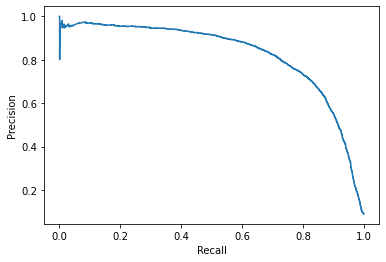

In [36]:
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")

Interprétation des résultats

Nous pouvons observer que la précision commence à chuter à un rappel de 0.6 puis chute énormément après que le rappel dépasse 0.8

### 2.2.4 Courbe ROC

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

In [38]:
#1)
my_y_scores = y_scores
fpr, tpr, tresholds = roc_curve(y_train_5,my_y_scores)

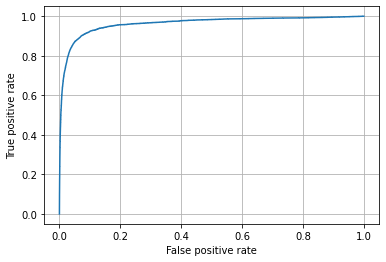

In [39]:
#2)
plt.plot(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.grid()

In [40]:
#3)
ras = roc_auc_score(y_train_5,my_y_scores)
ras

0.962767866718215

# 3  Apprentissage d'un classifieur multi-classe
## 3.1 Apprentissage des données

In [41]:
sgd_clf = SGDClassifier(random_state=42)                                   
sgd_clf.fit(X_train, y_train) 

SGDClassifier(random_state=42)

In [42]:
sgd_clf.score(X_test, y_test)

0.8732

In [43]:
test = sgd_clf.predict([some_digit])
test

array([5], dtype=uint8)

In [44]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([[-15816.16163436, -30078.97448576, -19305.15099698,
         -2906.09118357, -22712.5842375 ,  -2757.97416019,
        -20402.89016834, -10917.72098911, -12328.17651453,
         -7516.45111872]])

In [45]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

On remarque que les classes sont rangées par ordre croissant et qu'il n'y a pas de doublons.

## 3.2 Evaluation du modèle d'apprentissage sur les données d'apprentissage
### 3.2.1 Taux de classification

In [46]:
scores_n = cross_val_score(sgd_clf, X_train, y_train,scoring="accuracy", cv=3)
scores_n

array([0.84085, 0.8528 , 0.88215])

In [47]:
scores_n.mean()


0.8586

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

In [50]:
X_train = scaler.fit_transform(X_train)

In [51]:
scores_s = cross_val_score(sgd_clf, X_train, y_train,scoring="accuracy", cv=3)
scores_s

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.9083, 0.9033, 0.9028])

In [52]:
scores_s.mean()


0.9047999999999999

In [53]:
print("Avant le Scaling nous avions une moyenne de", scores_n.mean(), "tandis qu'après nous avons", scores_s.mean().round(4), "On peut donc conclure que les résultats sont meilleurs après le Scaling.")

Avant le Scaling nous avions une moyenne de 0.8586 tandis qu'après nous avons 0.9047999999999999 On peut donc conclure que les résultats sont meilleurs après le Scaling.


### 3.2.2 Matrice de confusion

In [54]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [55]:
print(confusion_matrix(y_train, y_train_pred))

[[5653    0   12    7    9   46   38    6  174    2]
 [   1 6435   47   23    4   40    7   12  167   11]
 [  27   26 5316   92   80   23   69   48  302   13]
 [  25   22  118 5289    2  208   26   48  298   77]
 [  10   11   53   10 5297   11   37   21  245  189]
 [  35   17   30  167   56 4507   84   21  390   65]
 [  33   17   54    2   37  108 5527    4  114    1]
 [  24   14   70   28   49   14    5 5677  111  253]
 [  23   59   43   93    4  125   42    9 5347   67]
 [  29   27   28   70  135   42    1  171  244 5240]]
